# Elmo

## Import Packages

In [7]:
!pip install tensorflow==2.3
!pip install "tensorflow_hub>=0.6.0"
!pip3 install tensorflow_text==2.3

     |████████████████████████████████| 2.6MB 13.8MB/s 


In [8]:
#Load packages
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn import metrics, preprocessing,model_selection 
from sklearn.metrics import accuracy_score 
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense 
from tensorflow.keras.models import Model 
import tensorflow.keras.backend as K 
import matplotlib.pyplot as pit 
import seaborn as sns
import numpy as np 
import string 
import pandas as pd 
import re
import spacy 
from nltk.corpus import stopwords 
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS 
from spacy.lang.en import English 
spacy.load('en')
parser = English()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##load Elmo

In [44]:
# get elmo from tensorflow hub
import tensorflow_hub as hub 
import tensorflow as tf 

embed = hub.load('https://tfhub.dev/google/elmo/2')

In [72]:
def ElmoEmbedding(x):
  embeddings = embed.signatures["default"](tf.constant(x))["elmo"]
  return embeddings

## Pre-process Data

In [92]:
import pandas as pd
#load training and testing dataset
train_df = pd.read_csv('/content/drive/MyDrive/hotel-review-sentiment-analysis/Clean_train_data.csv')
test_df = pd.read_csv('/content/drive/MyDrive/hotel-review-sentiment-analysis/Clean_test_data.csv')
train_df.head()

,text,label
0,staff great love location small single room fa...,1
1,insect around room dirty bathroom air conditio...,0
2,rather like feel room open plan great idea hotel,1
3,hotel clean bed comfortable,1
4,fan bathroom seem always noise road also bite ...,0


In [47]:
print(len(test_df.label))

30000


In [83]:
# Convert sentence to elmo vector
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn import preprocessing
import keras
import numpy as np

train_df['text'] = train_df['text'].astype(str)
test_df['text'] = test_df['text'].astype(str)

train_df = train_df[:100]
test_df = test_df[:100]

train_x = list(train_df['text'])
train_y = list(train_df['label'])
test_x  = list(test_df['text'])
test_y  = list(test_df['label'])

In [84]:
# Elmo training, Extract elmo embedding
elmo_train = ElmoEmbedding(train_x)
elmo_test  = ElmoEmbedding(test_x)

In [85]:
train_x = elmo_train
train_y = train_df['label']
test_x  = elmo_train
test_y  = test_df['label']

In [76]:
#elmo_train.shape
elmo_test.shape

TensorShape([100, 155, 1024])

## With cnn

In [86]:
#model parameter
vocab_size = 1000
embedding_dim = 1024
max_length = 512
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = 0.7

In [87]:
#return model
model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(128, 5, activation='relu'),
  tf.keras.layers.GlobalMaxPooling1D(),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model.build(input_shape=[len(train_x),max_length,embedding_dim])

# model summary
model.summary ()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (100, 508, 128)           655488    
_________________________________________________________________
global_max_pooling1d_6 (Glob (100, 128)                0         
_________________________________________________________________
dense_12 (Dense)             (100, 24)                 3096      
_________________________________________________________________
dense_13 (Dense)             (100, 1)                  25        
Total params: 658,609
Trainable params: 658,609
Non-trainable params: 0
_________________________________________________________________


In [91]:
history = model.fit(np.array(train_x), np.array(train_y), verbose=1, epochs=20,validation_data=(np.array(test_x), np.array(test_y)))
model.save_weights('./elmo-model.h5')

Epoch 1/20
10/10 [==============================] - 0s 15ms/step - loss: 1.2746e-04 - accuracy: 1.0000 - val_loss: 4.9375 - val_accuracy: 0.5100
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 1.1173e-04 - accuracy: 1.0000 - val_loss: 5.0084 - val_accuracy: 0.5100
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: 9.9771e-05 - accuracy: 1.0000 - val_loss: 5.0825 - val_accuracy: 0.5100
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 8.9149e-05 - accuracy: 1.0000 - val_loss: 5.1388 - val_accuracy: 0.5100
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 8.0385e-05 - accuracy: 1.0000 - val_loss: 5.1978 - val_accuracy: 0.5100
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 7.3136e-05 - accuracy: 1.0000 - val_loss: 5.2611 - val_accuracy: 0.5100
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 6.6440e-05 - accuracy: 1.0000 - val_loss: 5.3193 - val_accuracy

In [93]:
print(history.history)

{'loss': [0.00012745913409162313, 0.00011172918311785907, 9.977097943192348e-05, 8.914913632906973e-05, 8.038477972149849e-05, 7.313635433092713e-05, 6.644031964242458e-05, 5.9970156144117936e-05, 5.548862827708945e-05, 5.1063219871139154e-05, 4.7404308133991435e-05, 4.4037871703039855e-05, 4.12239896832034e-05, 3.865291000693105e-05, 3.6226821976015344e-05, 3.419295899220742e-05, 3.211318835383281e-05, 3.040145202248823e-05, 2.8826463676523417e-05, 2.732042412390001e-05], 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [4.937524795532227, 5.008411407470703, 5.082473278045654, 5.138761043548584, 5.197761058807373, 5.261086463928223, 5.319265365600586, 5.367901802062988, 5.417576789855957, 5.461402416229248, 5.501834869384766, 5.542264938354492, 5.5808539390563965, 5.616197109222412, 5.651489734649658, 5.68105411529541, 5.713272571563721, 5.745837211608887, 5.7780046463012695, 5.8079142570495605], 'val_accurac

**Predicting output from model**

In [94]:
#print(train_padded)
prediction = model.predict(np.array(elmo_test))

In [95]:
pred_y = (prediction > 0.5)

**Calculating Precision , Recall ,Accuracy ,Confusion Matrix and Graph**

In [96]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,accuracy_score
print("F1-score: {0}".format(f1_score(pred_y, test_y)))
print("Precision: ",precision_score(pred_y, test_y))
print("Recall: ",recall_score(pred_y, test_y))
print("Accuracy: ",accuracy_score(pred_y,test_y))
print("Confusion matrix: ")
confusion_matrix(pred_y, test_y)

F1-score: 0.811881188118812
Precision:  0.7735849056603774
Recall:  0.8541666666666666
Accuracy:  0.81
Confusion matrix: 


array([[40, 12],
       [ 7, 41]])

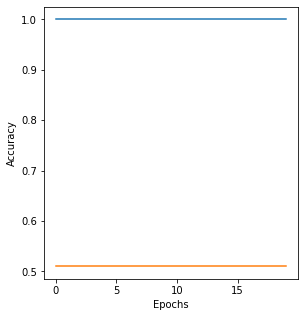

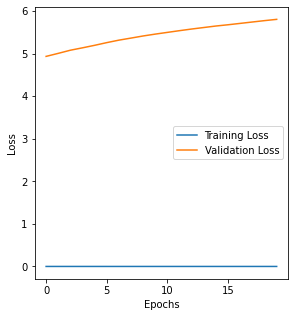

In [97]:
# accuracy and loss
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

## With RNN

In [98]:
# model initialization
model = tf.keras.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid' )
])

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
   metrics=['accuracy'])
model.build(input_shape=[len(elmo_train),max_length,embedding_dim])

# model summary
model.summary ()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (100, 200)                900000    
_________________________________________________________________
dense_14 (Dense)             (100, 24)                 4824      
_________________________________________________________________
dense_15 (Dense)             (100, 1)                  25        
Total params: 904,849
Trainable params: 904,849
Non-trainable params: 0
_________________________________________________________________


In [99]:
history = model.fit(np.array(elmo_train), np.array(train_y), verbose=1, epochs=20, validation_data=(np.array(elmo_test), np.array(test_y)))
model.save_weights('./elmo-model.h5')

Epoch 1/20
4/4 [==============================] - 1s 159ms/step - loss: 0.6534 - accuracy: 0.6500 - val_loss: 0.5868 - val_accuracy: 0.6100
Epoch 2/20
4/4 [==============================] - 0s 25ms/step - loss: 0.4731 - accuracy: 0.7300 - val_loss: 0.4798 - val_accuracy: 0.7900
Epoch 3/20
4/4 [==============================] - 0s 26ms/step - loss: 0.3850 - accuracy: 0.8500 - val_loss: 0.3934 - val_accuracy: 0.8500
Epoch 4/20
4/4 [==============================] - 0s 27ms/step - loss: 0.2060 - accuracy: 0.9500 - val_loss: 0.4206 - val_accuracy: 0.8200
Epoch 5/20
4/4 [==============================] - 0s 25ms/step - loss: 0.1204 - accuracy: 0.9700 - val_loss: 0.4149 - val_accuracy: 0.8400
Epoch 6/20
4/4 [==============================] - 0s 24ms/step - loss: 0.1079 - accuracy: 0.9600 - val_loss: 0.4162 - val_accuracy: 0.8600
Epoch 7/20
4/4 [==============================] - 0s 24ms/step - loss: 0.0532 - accuracy: 0.9900 - val_loss: 0.4498 - val_accuracy: 0.8200
Epoch 8/20
4/4 [==========

In [ ]:
print(history.history)

In [100]:
#print(train_padded)
prediction = model.predict(np.array(elmo_test))
pred_y = (prediction > 0.5)

In [101]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,accuracy_score
print("F1-score: {0}".format(f1_score(pred_y, test_y)))
print("Precision: ",precision_score(pred_y, test_y))
print("Recall: ",recall_score(pred_y, test_y))
print("Accuracy: ",accuracy_score(pred_y,test_y))
print("Confusion matrix: ")
confusion_matrix(pred_y, test_y)

F1-score: 0.8453608247422681
Precision:  0.7735849056603774
Recall:  0.9318181818181818
Accuracy:  0.85
Confusion matrix: 


array([[44, 12],
       [ 3, 41]])

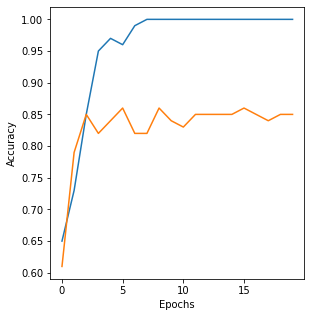

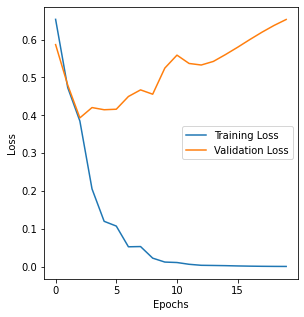

In [102]:
# accuracy and loss
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

##With RMDL

In [103]:
# model initialization
model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(128, 5, activation='relu'),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid' )
])

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
   metrics=['accuracy'])
model.build(input_shape=[len(elmo_train),max_length,embedding_dim])

# model summary
model.summary ()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (100, 508, 128)           655488    
_________________________________________________________________
bidirectional_1 (Bidirection (100, 64)                 41216     
_________________________________________________________________
dense_16 (Dense)             (100, 24)                 1560      
_________________________________________________________________
dense_17 (Dense)             (100, 1)                  25        
Total params: 698,289
Trainable params: 698,289
Non-trainable params: 0
_________________________________________________________________


In [104]:
history = model.fit(np.array(elmo_train), np.array(train_y), verbose=1, epochs=20, validation_data=(np.array(elmo_test), np.array(test_y)))
model.save_weights('./elmo-model.h5')

Epoch 1/20
4/4 [==============================] - 1s 158ms/step - loss: 0.6996 - accuracy: 0.5400 - val_loss: 0.6349 - val_accuracy: 0.7400
Epoch 2/20
4/4 [==============================] - 0s 24ms/step - loss: 0.5217 - accuracy: 0.9400 - val_loss: 0.5079 - val_accuracy: 0.8400
Epoch 3/20
4/4 [==============================] - 0s 23ms/step - loss: 0.4003 - accuracy: 0.8800 - val_loss: 0.4452 - val_accuracy: 0.8500
Epoch 4/20
4/4 [==============================] - 0s 23ms/step - loss: 0.2599 - accuracy: 0.9600 - val_loss: 0.4154 - val_accuracy: 0.8600
Epoch 5/20
4/4 [==============================] - 0s 23ms/step - loss: 0.1522 - accuracy: 0.9900 - val_loss: 0.4847 - val_accuracy: 0.8200
Epoch 6/20
4/4 [==============================] - 0s 23ms/step - loss: 0.0932 - accuracy: 1.0000 - val_loss: 0.4680 - val_accuracy: 0.8400
Epoch 7/20
4/4 [==============================] - 0s 23ms/step - loss: 0.0564 - accuracy: 1.0000 - val_loss: 0.4800 - val_accuracy: 0.8300
Epoch 8/20
4/4 [==========

In [105]:
#print(train_padded)
prediction = model.predict(np.array(elmo_test))
pred_y = (prediction > 0.5)

In [106]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,accuracy_score
print("F1-score: {0}".format(f1_score(pred_y, test_y)))
print("Precision: ",precision_score(pred_y, test_y))
print("Recall: ",recall_score(pred_y, test_y))
print("Accuracy: ",accuracy_score(pred_y,test_y))
print("Confusion matrix: ")
confusion_matrix(pred_y, test_y)

F1-score: 0.8453608247422681
Precision:  0.7735849056603774
Recall:  0.9318181818181818
Accuracy:  0.85
Confusion matrix: 


array([[44, 12],
       [ 3, 41]])

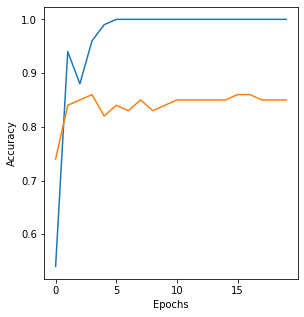

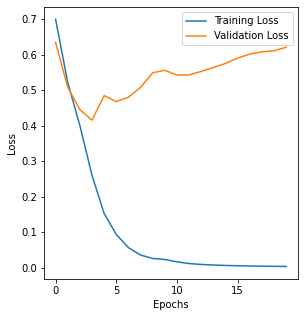

In [107]:
# accuracy and loss
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

##With Multi-Channel CNN


In [ ]:
# issue with it
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model


def define_model(length, vocab_size):
	# channel 1
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 100)(inputs1)
	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
	# channel 2
	inputs2 = Input(shape=(length,))
	embedding2 = Embedding(vocab_size, 100)(inputs2)
	conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)
	# channel 3
	inputs3 = Input(shape=(length,))
	embedding3 = Embedding(vocab_size, 100)(inputs3)
	conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D(pool_size=2)(drop3)
	flat3 = Flatten()(pool3)
	# merge
	merged = concatenate([flat1, flat2, flat3])
	# interpretation
	dense1 = Dense(10, activation='relu')(merged)
	outputs = Dense(1, activation='sigmoid')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	plot_model(model, show_shapes=True, to_file='multichannel.png')
	return model

In [ ]:
model = define_model(max_length, vocab_size)
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
   metrics=['accuracy'])
model.build(input_shape=[len(elmo_train),max_length,embedding_dim])

# model summary
model.summary ()

In [ ]:
history = model.fit(np.array(train_x), np.array(train_y), verbose=1, epochs=20)
model.save_weights('./elmo-model.h5')